# Clustering en el conjunto de datos

## 1. Preparar los Datos

Primero, asegúrate de tener las bibliotecas necesarias:

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


df = pd.read_excel("/content/MAESTRO DE NOTAS Correguido.xls")
df


,Periodo,Paralelo,Identificacion,Estudiante,Carrera,Nivel,Asignatura,Num_matricula,Unnamed: 8,Asistencia,Nota final,Estado,Unnamed: 12,Estado Matrícula,Tipo Ingreso,Cédula docente,Nombre docente
0,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-114-COMUNICACIÓN ORAL Y ESCRITA,1,NaN,93.75,8.59,APROBADO,NaN,APROBADO,NORMAL,103002036.0,ANA BEATRIZ PIEDRA MARTINEZ
1,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-111-DERECHOS HUMANOS EN EL CONTEXTO PENITE...,1,NaN,100.00,8.88,APROBADO,NaN,APROBADO,NORMAL,103867156.0,CRUZ GERMANIA DIAZ HERRERA
2,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR-113-ÉTICA PROFESIONAL Y RELACIONES HUMANAS,1,NaN,100.00,9.30,APROBADO,NaN,APROBADO,NORMAL,103867156.0,CRUZ GERMANIA DIAZ HERRERA
3,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPR_132-FASE PRÁCTICA,1,NaN,100.00,10.00,APROBADO,NaN,APROBADO,NORMAL,103867156.0,CRUZ GERMANIA DIAZ HERRERA
4,2023-2P,A_MATUTINA,1750959585,AGUALONGO GUANOTAXI LIDA GERMANIA,SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...,PRIMERO,SPRI-112-INSTRUCCIÓN PENITENCIARIA,1,NaN,100.00,9.20,APROBADO,NaN,APROBADO,NORMAL,103867156.0,CRUZ GERMANIA DIAZ HERRERA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,2023-2P,A_VESPERTINA,105577068,ZUÑIGA LLIVISACA JUAN FERNANDO,TSMCT-TECNOLOGIA SUPERIOR EN MECATRONICA,PRIMERO,TSMCT-112-ELECTRÓNICA BÁSICA,1,NaN,100.00,9.25,APROBADO,NaN,APROBADO,NORMAL,105274468.0,ANIBAL ARMANDO PEDROSA ASTUDILLO
6003,2023-2P,A_VESPERTINA,105577068,ZUÑIGA LLIVISACA JUAN FERNANDO,TSMCT-TECNOLOGIA SUPERIOR EN MECATRONICA,PRIMERO,TSMCT-132-PRÁCTICAS FORMATIVAS I,1,NaN,100.00,9.55,APROBADO,NaN,APROBADO,NORMAL,104264072.0,PABLO ANDRES NARVAEZ GUZNAY
6004,2023-2P,A_VESPERTINA,105577068,ZUÑIGA LLIVISACA JUAN FERNANDO,TSMCT-TECNOLOGIA SUPERIOR EN MECATRONICA,PRIMERO,TSMCT-111-FÍSICA-PRÁCTICA LAB,1,NaN,100.00,8.91,APROBADO,NaN,APROBADO,NORMAL,106528847.0,NATHALY LIZBETH RODRIGUEZ CABRERA
6005,2023-2P,A_VESPERTINA,105577068,ZUÑIGA LLIVISACA JUAN FERNANDO,TSMCT-TECNOLOGIA SUPERIOR EN MECATRONICA,PRIMERO,TSMCT-116-LENGUAJE COMUNICACIÓN E INVESTIGACIÓN,1,NaN,93.75,9.84,APROBADO,NaN,APROBADO,NORMAL,103002036.0,ANA BEATRIZ PIEDRA MARTINEZ


## 2. Preprocesar los Datos

Seleccionaremos características relevantes para el clustering y escalaremos los datos:

In [11]:
df_eliminar = ['Estudiante', 'Nombre docente','Unnamed: 8','Unnamed: 12']

In [12]:
df.drop(df_eliminar, axis=1, inplace=True)

In [13]:
from sklearn.preprocessing import StandardScaler

# Seleccionar características para clustering
X = df[["Num_matricula", "Asistencia", "Nota final"]]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 3. Aplicar K-Means

Definimos el número de clusters y aplicamos el algoritmo K-Means:

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Supongamos que tienes un DataFrame de Pandas llamado df
# Reemplazar valores NaN por 0 en las columnas seleccionadas
df_filled = df.fillna({'Num_matricula': 0, 'Asistencia': 0.0, 'Nota final': 0.0})

# Seleccionar características para clustering
feature_columns = ['Num_matricula', 'Asistencia', 'Nota final']
X = df_filled[feature_columns]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para mostrar el resultado
df_scaled = pd.DataFrame(X_scaled, columns=feature_columns)

# Mostrar el resultado
print(df_scaled.head())

# Realizar clustering KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Agregar los resultados de clustering al DataFrame original
df_filled['Cluster'] = clusters

# Mostrar el DataFrame con los clusters
print(df_filled.head())

   Num_matricula  Asistencia  Nota final
0      -0.181492    0.183570    0.389576
1      -0.181492    0.438479    0.500793
2      -0.181492    0.438479    0.661866
3      -0.181492    0.438479    0.930322
4      -0.181492    0.438479    0.623515
   Periodo    Paralelo  Identificacion  \
0  2023-2P  A_MATUTINA      1750959585   
1  2023-2P  A_MATUTINA      1750959585   
2  2023-2P  A_MATUTINA      1750959585   
3  2023-2P  A_MATUTINA      1750959585   
4  2023-2P  A_MATUTINA      1750959585   

                                             Carrera    Nivel  \
0  SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...  PRIMERO   
1  SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...  PRIMERO   
2  SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...  PRIMERO   
3  SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...  PRIMERO   
4  SP R-TECNICO SUPERIOR EN SEGURIDAD PENITENCIAR...  PRIMERO   

                                          Asignatura  Num_matricula  \
0                SPR-114-COMUNICACIÓN O

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
# Definir el número de clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Agregar el resultado del clustering al DataFrame
df['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 4. Visualizar los Resultados del Clustering

Podemos visualizar los resultados del clustering en un gráfico 2D usando dos de las características:

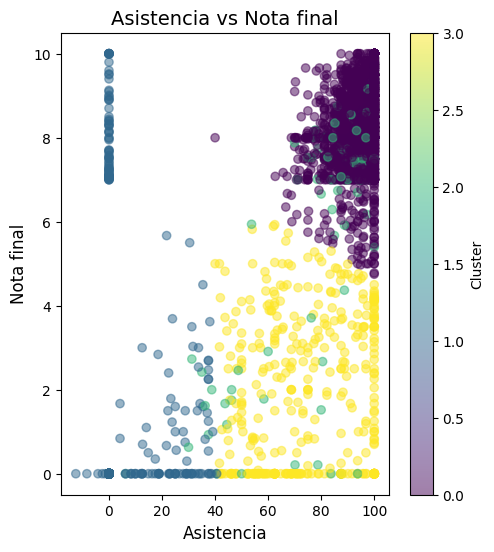

In [25]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
plt.scatter(df_filled['Asistencia'], df_filled['Nota final'], c=df_filled['Cluster'], cmap='viridis', alpha=0.5)
plt.title("Asistencia vs Nota final", fontsize=14)
plt.xlabel("Asistencia", fontsize=12)
plt.ylabel("Nota final", fontsize=12)
plt.colorbar(label='Cluster')

## 5. Análisis de Resultados de Clustering

Ahora puedes analizar cada cluster:

In [27]:
# Resumen de clusters
cluster_summary = df_filled.groupby('Cluster').agg({
    'Num_matricula': 'mean',
    'Asistencia': 'mean',
    'Nota final': 'mean'
}).reset_index()

print(cluster_summary)


   Cluster  Num_matricula  Asistencia  Nota final
0        0       1.000000   97.131157    8.496558
1        1       1.000000    5.603400    1.747122
2        2       2.101942   87.773738    6.968835
3        3       1.000000   75.079638    2.021085


## Interpretación de Cada Cluster
Interpretación de Cada Cluster
Cluster 0:

Num_matricula: 1.000000
Este cluster tiene el valor más bajo de Num_matricula, lo que podría indicar una menor cantidad de inscripciones.

Asistencia: 97.13
Alta asistencia, sugiriendo que los estudiantes en este cluster tienden a asistir a clases con regularidad.

Nota final: 8.50
Notas finales elevadas, indicando un buen rendimiento académico en este grupo.

Cluster 1:

Num_matricula: 1.000000
Similar al Cluster 0, tiene un valor bajo de Num_matricula, sugiriendo una baja inscripción.

Asistencia: 5.60
La asistencia es muy baja, indicando que los estudiantes en este cluster tienen problemas para asistir regularmente a las clases.

Nota final: 1.75
Las notas finales son bastante bajas, lo que puede reflejar un bajo rendimiento académico.

Cluster 2:

Num_matricula: 2.10
Este cluster tiene un Num_matricula más alto, indicando una mayor cantidad de inscripciones en comparación con los Clusters 0 y 1.

Asistencia: 87.77
La asistencia es alta, pero no tan alta como en el Cluster 0, sugiriendo que la mayoría de los estudiantes asisten regularmente.

Nota final: 6.97
Las notas finales son intermedias, reflejando un rendimiento académico aceptable.

Cluster 3:

Num_matricula: 1.000000
Igual que en los otros clusters, tiene un bajo Num_matricula.

Asistencia: 75.08
La asistencia es buena, pero menor en comparación con el Cluster 0.

Nota final: 2.02
Las notas finales son bajas, lo que podría indicar problemas académicos a pesar de una asistencia relativamente buena.

Conclusiones Generales
Segmentación del Estudio:

Los clusters muestran variaciones significativas en la asistencia y las notas finales. Esto sugiere que hay distintos grupos con diferentes comportamientos académicos que deben ser considerados por los educadores.
Estrategias de Apoyo Académico:

Para el Cluster 0, que tiene buena asistencia y rendimiento, podrían implementarse programas de enriquecimiento para maximizar su potencial.
Para el Cluster 1, que tiene baja asistencia y rendimiento, se podrían implementar estrategias para aumentar la participación y apoyo académico.
El Cluster 2, con una buena asistencia y rendimiento aceptable, puede beneficiarse de incentivos para mejorar aún más su rendimiento.
El Cluster 3, con buena asistencia pero bajo rendimiento, podría necesitar intervenciones específicas para mejorar el rendimiento académico.
Decisiones Administrativas:

La administración educativa puede usar estos clusters para diseñar estrategias de intervención personalizadas y mejorar el desempeño académico en función del comportamiento de los estudiantes en cada cluster.
